In [1]:
# Loading the data
import pandas as pd

data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(data_url, sep = ";")

In [2]:
# examining the data
# checking data samples
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# features
feature_list = data.columns[:-1].values
label = [data.columns[-1]]

print("Features list: ", feature_list)
print("Label: ", label)

Features list:  ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
Label:  ['quality']


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

Text(0, 0.5, 'Count')

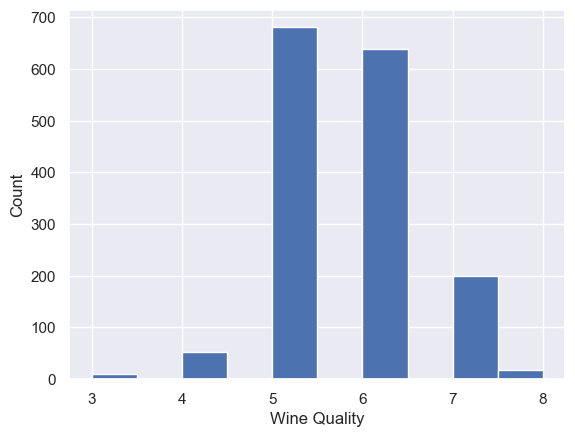

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
data.quality.hist()
plt.xlabel('Wine Quality')
plt.ylabel('Count')

<Axes: >

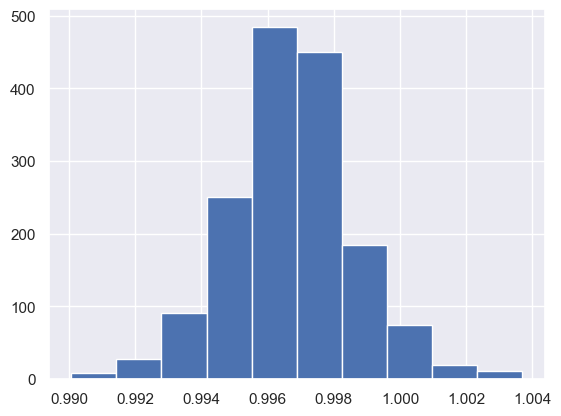

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
data.density.hist()

In [9]:
# creating a test set
# the below function is used to split the data into training and test.
# Make sure to seed so that we get the same test set int the next run.
import numpy as np
def split_train_test(data,test_ratio):
    # set the random seed.
    np.random.seed(42)
    # shuffle the dataset.
    shuffled_indices = np.random.permutation(len(data))
    # calculate the size of the test set.
    test_set_size = int(len(data)*test_ratio)
    # split dataset to get training and test sets.
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
# sklearn provides a few functions for creating test sets based on
# 1. Random Sampling , 2. Stratified Sampling
# 1. Random sampling, which randomly selects k% points in the test set
# 2.Stratified Sampling, which samples test examples such that they are representative of overall distribution
# train_test_split function performs random sampling with
#   .random_state parameter to set the random seed, which ensures that the same exaamples are seected for test sets across runs.
#   .test_size parameter for specifying size of test set
#   .shuffle flag to specify if the data needs to be shuffled before splitting.
# provision for processing multiple datasets with an identical number of rows and
# selecting the same indices from these datasets.
# useful when labeling are in different datasets.
from sklearn.model_selection import train_test_split
? train_test_split

Signature:
 train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

tra

In [11]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
print(train_set)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
493             8.7             0.690         0.31             3.0      0.086  \
354             6.1             0.210         0.40             1.4      0.066   
342            10.9             0.390         0.47             1.8      0.118   
834             8.8             0.685         0.26             1.6      0.088   
705             8.4             1.035         0.15             6.0      0.073   
...             ...               ...          ...             ...        ...   
1130            9.1             0.600         0.00             1.9      0.058   
1294            8.2             0.635         0.10             2.1      0.073   
860             7.2             0.620         0.06             2.7      0.077   
1459            7.9             0.200         0.35             1.7      0.054   
1126            5.8             0.290         0.26             1.7      0.063   

      free sulfur dioxide  

<Axes: >

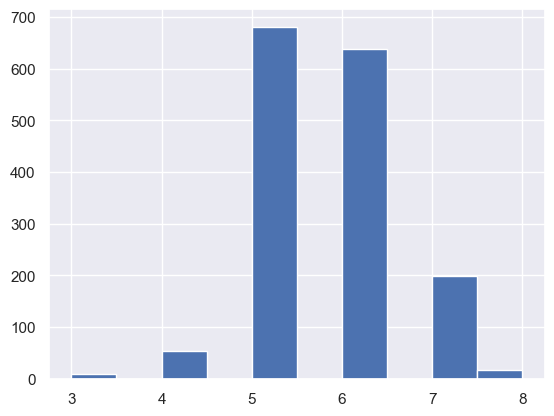

In [12]:
# 2.Stratified Sampling
# Data distribution may not be uniform in real world data.TRandom sampling by its nature introduces bias in such data sets
# the label distribution in our dataset was also not uniform
sns.set_theme()
data.quality.hist()
# label 5 and 6 are over represented in the dataset whereas other labels are underrepresented in the dataset.

In [21]:
# we divide th epopulation into homogenous groups called strata.
# Data is sampled from stratum so as to match it with the overall data distribution
# Scikit-learn provides a class StratifiedShuffleSplit that helps us in stratified sampling.
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(data, data["quality"]):
    strat_train_set =  data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [22]:
# lets examine the test set distribution by the wine quality
# that was used for stratified sampling.
strat_dist = strat_test_set["quality"].value_counts()/len(strat_test_set)
strat_dist

quality
5    0.425000
6    0.400000
7    0.125000
4    0.034375
8    0.009375
3    0.006250
Name: count, dtype: float64

In [23]:
# let's now compare it with the overall distribution.
overall_dist = data["quality"].value_counts()/len(data)
overall_dist

quality
5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: count, dtype: float64

In [25]:
exploration_set = strat_train_set.copy()
# its a good idea to create a copy of the training set so that we can freely manipulate it without worrying about any manipualtion in the original set.add

<Axes: xlabel='fixed acidity', ylabel='density'>

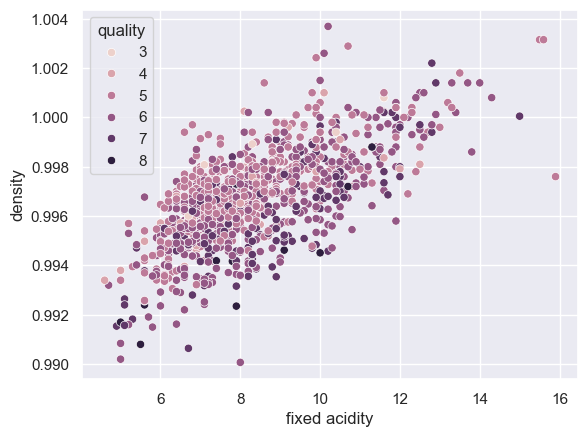

In [ ]:
# Scatter Visualisation
# with seaborn library:
sns.scatterplot(x='fixed acidity',y='density',hue='quality',data=exploration_set)


In [27]:
?sns.scatterplot

Signature:
sns.scatterplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    size=None,
    style=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    sizes=None,
    size_order=None,
    size_norm=None,
    markers=True,
    style_order=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Draw a scatter plot with possibility of several semantic groupings.

The relationship between `x` and `y` can be shown for different subsets
of the data using the `hue`, `size`, and `style` parameters. These
parameters control what visual semantics are used to identify the different
subsets. It is possible to show up to three dimensions independently by
using all three semantic types, but this style of plot can be hard to
interpret and is often ineffective. Using redundant semantics (i.e. both
`hue` and `style` for the same variable) can be helpful for making
graphics more accessible.

See the :ref:`tutorial <relational_tutorial>` for more information.

The de

<Axes: xlabel='fixed acidity', ylabel='density'>

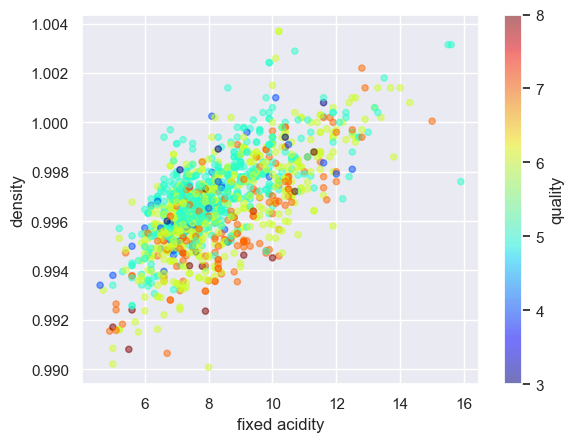

In [29]:
# Scatter plot with matplotlib
exploration_set.plot(kind='scatter',x='fixed acidity',y='density',alpha = 0.5,c="quality",cmap=plt.get_cmap("jet"))

In [31]:
# Standard coorelation coefficient 
# Ranges between -1 to +1
# +1: Strong positive correlation
# -1:  Strong negative correlation
# 0: No linear correlation between features
# visualisation with heat map: only captures linear relationship
# for non-linear relationship between features: use rank correlation


# calculating correlation between features
corr_matrix = exploration_set.corr()
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.247712,0.662363,0.120815,0.093881,-0.123203,-0.088770,0.668990,-0.674780,0.177493,-0.059853,0.107940
volatile acidity,-0.247712,1.000000,-0.543362,-0.002826,0.048699,-0.012979,0.065962,0.026262,0.232789,-0.257722,-0.205491,-0.383249
citric acid,0.662363,-0.543362,1.000000,0.170988,0.225691,-0.032409,0.070900,0.363450,-0.546526,0.312819,0.107308,0.210802
residual sugar,0.120815,-0.002826,0.170988,1.000000,0.050461,0.186637,0.214147,0.343316,-0.091494,0.003743,0.052004,0.003710
chlorides,0.093881,0.048699,0.225691,0.050461,1.000000,0.005071,0.049451,0.195681,-0.287841,0.403491,-0.230659,-0.120231
free sulfur dioxide,-0.123203,-0.012979,-0.032409,0.186637,0.005071,1.000000,0.657639,0.009101,0.051275,0.055357,-0.085068,-0.048291
total sulfur dioxide,-0.088770,0.065962,0.070900,0.214147,0.049451,0.657639,1.000000,0.090877,-0.103004,0.056656,-0.224324,-0.194511
density,0.668990,0.026262,0.363450,0.343316,0.195681,0.009101,0.090877,1.000000,-0.347765,0.148025,-0.509323,-0.193009
pH,-0.674780,0.232789,-0.546526,-0.091494,-0.287841,0.051275,-0.103004,-0.347765,1.000000,-0.229115,0.211668,-0.052063
sulphates,0.177493,-0.257722,0.312819,0.003743,0.403491,0.055357,0.056656,0.148025,-0.229115,1.000000,0.077041,0.228050


In [33]:
# let's check features that are correlated with the label, which is quality in this case of wine
corr_matrix['quality']
# note that quality has strong positive correlation with alcohol content[0.48] and strong negative correlation with volatile acidity [-0.38]

fixed acidity           0.107940
volatile acidity       -0.383249
citric acid             0.210802
residual sugar          0.003710
chlorides              -0.120231
free sulfur dioxide    -0.048291
total sulfur dioxide   -0.194511
density                -0.193009
pH                     -0.052063
sulphates               0.228050
alcohol                 0.481197
quality                 1.000000
Name: quality, dtype: float64

<Axes: >

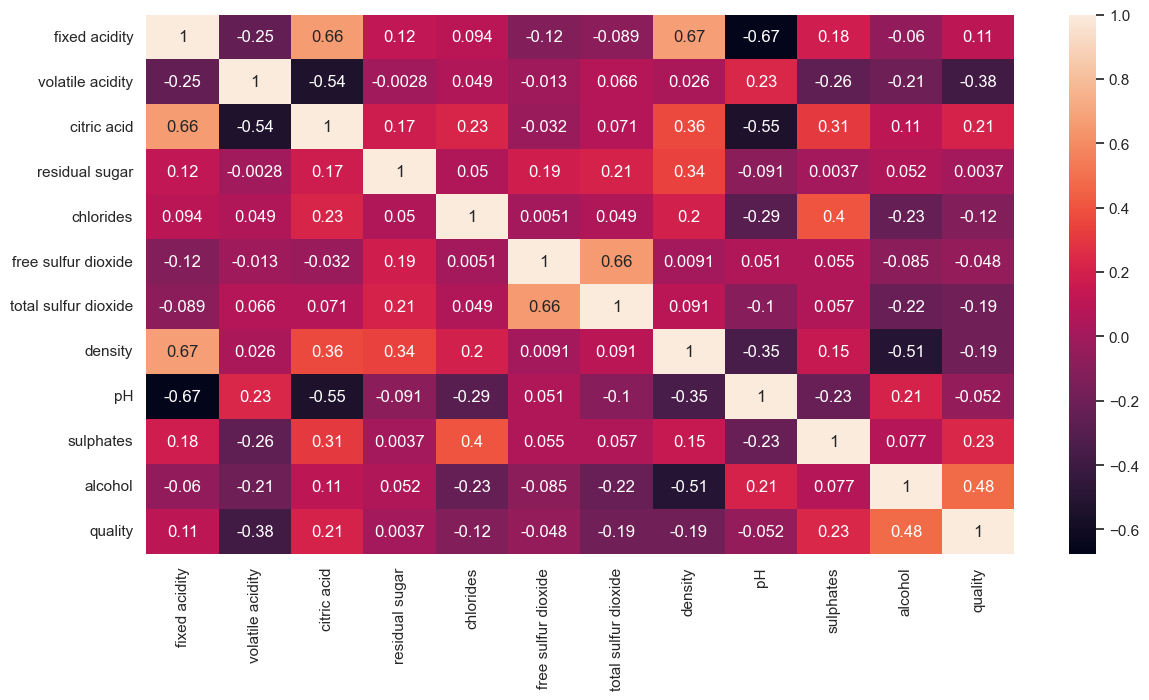

In [34]:
# Let's vizualise correlation matrix with heatmap:
plt.figure(figsize=(14,7))
sns.heatmap(corr_matrix,annot=True)

array([[<Axes: xlabel='citric acid', ylabel='citric acid'>,
        <Axes: xlabel='pH', ylabel='citric acid'>,
        <Axes: xlabel='alcohol', ylabel='citric acid'>,
        <Axes: xlabel='sulphates', ylabel='citric acid'>,
        <Axes: xlabel='quality', ylabel='citric acid'>],
       [<Axes: xlabel='citric acid', ylabel='pH'>,
        <Axes: xlabel='pH', ylabel='pH'>,
        <Axes: xlabel='alcohol', ylabel='pH'>,
        <Axes: xlabel='sulphates', ylabel='pH'>,
        <Axes: xlabel='quality', ylabel='pH'>],
       [<Axes: xlabel='citric acid', ylabel='alcohol'>,
        <Axes: xlabel='pH', ylabel='alcohol'>,
        <Axes: xlabel='alcohol', ylabel='alcohol'>,
        <Axes: xlabel='sulphates', ylabel='alcohol'>,
        <Axes: xlabel='quality', ylabel='alcohol'>],
       [<Axes: xlabel='citric acid', ylabel='sulphates'>,
        <Axes: xlabel='pH', ylabel='sulphates'>,
        <Axes: xlabel='alcohol', ylabel='sulphates'>,
        <Axes: xlabel='sulphates', ylabel='sulphates'>,
  

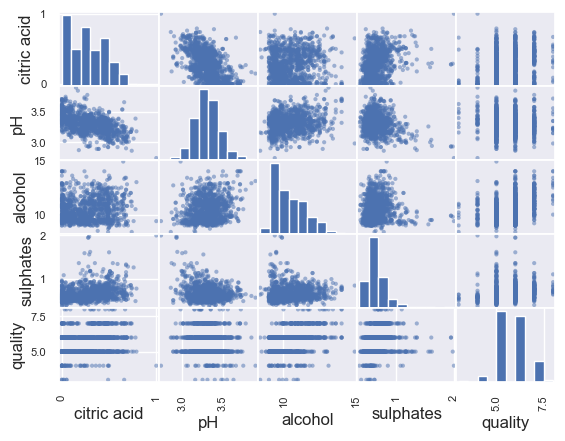

In [35]:
# the correlation coefficient on diagonal is +1.
# Darker colors represent negative correlations, while fainter colors denote positive correlations.
# scatter matrix can also be used to see correlation between features
from pandas.plotting import scatter_matrix
attribute_list = ['citric acid','pH','alcohol','sulphates','quality']
scatter_matrix(exploration_set[attribute_list])

In [ ]:
# similar analysis can be carried out with combined features - features that are derived from the original features.


In [36]:
# preparation of data fro ML Algorithms
# copying all features leaving aside the label
wine_features = strat_train_set.drop("quality",axis=1)

# copying the label list
wine_labels = strat_train_set['quality'].copy()

In [37]:
# Data Cleaning: before applying data cleaning , we need to check if there are missing values in feature set:
# One way to find that out is column-wise.
# counts the number of NaN in each column of wine_features
wine_features.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [41]:
# to fillup the missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
# here, we are replacing missing values by median

In [42]:
imputer.fit(wine_features)

SimpleImputer(strategy='median')

In [43]:
# lets' check the statistics learnt by the imputer on the training set:
imputer.statistics_

array([ 7.9    ,  0.52   ,  0.26   ,  2.2    ,  0.08   , 14.     ,
       39.     ,  0.99675,  3.31   ,  0.62   , 10.2    ])

In [44]:
wine_features.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.08000
free sulfur dioxide     14.00000
total sulfur dioxide    39.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
dtype: float64

In [46]:
# finally we will use the trained imputer to transform the training set such that the missing values are replaced by the medians:
tr_features = imputer.transform(wine_features)
# this returns an numpy array and we can convert it to the dataframe if needed:
# shape of 
tr_features.shape

(1279, 11)

In [48]:
wine_features_tr = pd.DataFrame(tr_features, columns=wine_features.columns)
wine_features_tr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.7,0.855,0.02,1.90,0.064,29.0,38.0,0.99472,3.30,0.56,10.75
1,6.9,0.630,0.33,6.70,0.235,66.0,115.0,0.99787,3.22,0.56,9.50
2,11.9,0.570,0.50,2.60,0.082,6.0,32.0,1.00060,3.12,0.78,10.70
3,8.6,0.470,0.27,2.30,0.055,14.0,28.0,0.99516,3.18,0.80,11.20
4,10.4,0.260,0.48,1.90,0.066,6.0,10.0,0.99724,3.33,0.87,10.90
...,...,...,...,...,...,...,...,...,...,...,...
1274,8.9,0.480,0.53,4.00,0.101,3.0,10.0,0.99586,3.21,0.59,12.10
1275,6.4,0.570,0.14,3.90,0.070,27.0,73.0,0.99669,3.32,0.48,9.20
1276,7.8,0.430,0.32,2.80,0.080,29.0,58.0,0.99740,3.31,0.64,10.30
1277,11.2,0.500,0.74,5.15,0.100,5.0,17.0,0.99960,3.22,0.62,11.20


In [51]:
# Handling text and categorical attributes:
#       1. Converting categories to numbers:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
# call fit_transform() method on ordinal_encoder object to convert text to numbers.
# the list of categories can be obtained via categories_instance variable.
# one issue with this representation is that tha ML Algoritm would assume that the two nearby values are closer than the distinct one.
#         2. Using one hot encoding
# Here, we create one binary feature per caegory - the feature value is 1 when the category is present else 0.
# In this, only one feature is hot(1), else other are all cold(0).
# The new features are refered to as dummy features.
# Scikit-Learn provides a OneHotEncoder class to convert categorical values into one-hot vectors.
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
# we need to call fit_transform() method on OneHotEncoder object.
# The output is a SciPy sparse matrix rather than Numpy array. this enables us to save space when we have a huge number of categories
# list of categories can be obtained by categories_ ,method

In [ ]:
# Feature scaling:
#   Most ML Algorithms dont perform well on very different scales.
# 1. min-max scaling or normalisation:
# in this, we substract minimum value of a feature from the current value and divide it by the difference between the minimum and maximum value of that feature.
# values are shifted and scaled so that the range is btw 0 and 1
# Scikit learn provides MinMaxScalar transformer for this
# 12:30